In [ ]:
#Importando bibliotecas pandas, matplotlib, scikit-learn

import pandas as pd #manipulação e análise dos dados da planilha
import matplotlib.pyplot as plt #criação de gráficos e visualizações de dados em geral
from sklearn import linear_model #algoritmo de Machine Learning com conjunto de técnicas e módulos para análise preditiva de dados

In [ ]:
#Carregando os dados do dataset (csv)
from google.colab import files
up = files.upload()

Saving abdomen_peso.csv to abdomen_peso.csv


In [ ]:
#Alocando o dataset para a variável data
data = pd.read_csv("abdomen_peso.csv", sep=";")

In [ ]:
data

,Abdomen,Peso
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


In [ ]:
#Verificando o comprimento da dimensão da tabela (15 linhas, 2 colunas)
data.shape

(15, 2)

In [ ]:
#Separando os dados das colunas para uma variável
dados_abdomen = pd.DataFrame(data["Abdomen"])
dados_peso = pd.DataFrame(data["Peso"])

In [ ]:
dados_abdomen

,Abdomen
0,71
1,89
2,64
3,74
4,87
5,93
6,79
7,81
8,75
9,72


In [ ]:
dados_peso

,Peso
0,51
1,66
2,45
3,57
4,64
5,75
6,61
7,62
8,55
9,53


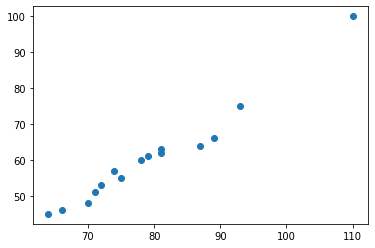

In [ ]:
#Plotando os dados usando o gráfico de dispersão
plt.scatter(dados_abdomen,dados_peso)
plt.show()

In [ ]:
#Coeficiente de correlação padrão - Pearson
data.corr()

,Abdomen,Peso
Abdomen,1.000000,0.981216
Peso,0.981216,1.000000


In [ ]:
#Construindo o modelo de previsão (regressão linear)

#iniciando a função de Regressão Linear
reg_linear = linear_model.LinearRegression()

#Treinando os dados
treino= reg_linear.fit(dados_abdomen, dados_peso)


In [ ]:
#Descobrindo o coeficiente angular
treino.coef_

array([[1.13470708]])

In [ ]:
#Descobrindo o intercepto
treino.intercept_

array([-29.62009537])

In [ ]:
#Avaliando o modelo - Coeficiente de determinação (R²)
treino.score(dados_abdomen,dados_peso)

0.9627843958606758

In [ ]:
#Carregando os dados da base (csv)
from google.colab import files
up = files.upload()

Saving new_abdomen.csv to new_abdomen.csv


In [ ]:
data_teste = pd.read_csv("new_abdomen.csv", sep=";")
data_teste

,New_abdomen
0,70
1,81
2,69
3,93
4,86


In [ ]:
prev = pd.DataFrame(data_teste)

In [ ]:
peso_predict = treino.predict(prev)
peso_predict

array([[49.80940054],
       [62.29117847],
       [48.67469346],
       [75.90766349],
       [67.9647139 ]])

In [ ]:
peso_predict = pd.DataFrame(peso_predict)

In [ ]:
planilha = pd.concat([data_teste,peso_predict], axis=1)
planilha

,New_abdomen,0
0,70,49.809401
1,81,62.291178
2,69,48.674693
3,93,75.907663
4,86,67.964714


In [ ]:
planilha.columns=['New_abdomen','Previsão_peso']
planilha

,New_abdomen,Previsão_peso
0,70,49.809401
1,81,62.291178
2,69,48.674693
3,93,75.907663
4,86,67.964714


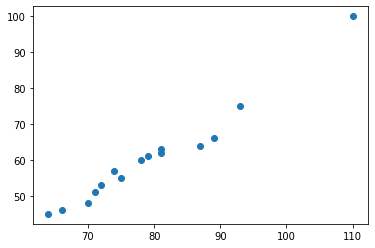

In [ ]:
plt.scatter(dados_abdomen,dados_peso)

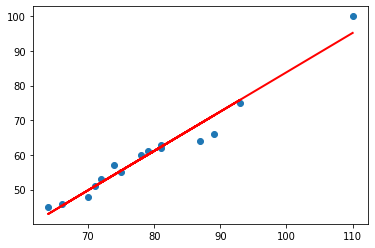

In [ ]:
plt.scatter(dados_abdomen,dados_peso)
plt.plot(dados_abdomen,treino.predict(dados_abdomen),color="red",linewidth=2)

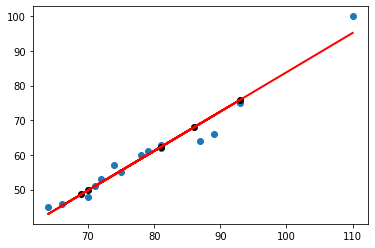

In [ ]:
plt.scatter(dados_abdomen,dados_peso)
plt.plot(dados_abdomen,treino.predict(dados_abdomen),color="red",linewidth=2)
plt.scatter(data_teste,peso_predict, color="black")